# Forecasting and nowcasting with Google Flu Trends

Rather than predicting the future, nowcasting attempts to use ideas from forecasting to measure the current state of the world; it attempts to “predict the present” (Choi and Varian 2012). Nowcasting has the potential to be especially useful to governments and companies that require timely and accurate measures of the world.

https://www.bitbybitbook.com/en/1st-ed/observing-behavior/strategies/forecasting/

## Predicting the Present with Google Trends

HYUNYOUNG CHOI and HAL VARIAN

Google, Inc., California, USA

> In this paper we show how to use search engine data to forecast near-term values of economic indicators. Examples include automobile sales, unemployment claims, travel destination planning
and consumer confidence.

Choi, Hyunyoung, and Hal Varian. 2012. “Predicting the Present with Google Trends.” Economic Record 88 (June):2–9. https://doi.org/10.1111/j.1475-4932.2012.00809.x.



## Detecting influenza epidemics using search engine query data

- Jeremy Ginsberg et al. (2009) Detecting influenza epidemics using search engine query data. Nature. 457, pp:1012–1014 https://www.nature.com/articles/nature07634#Ack1 

- **Google Query Data** https://static-content.springer.com/esm/art%3A10.1038%2Fnature07634/MediaObjects/41586_2009_BFnature07634_MOESM271_ESM.xls Query fractions for the top 100 search queries, sorted by mean Z-transformed correlation with CDC-provided ILI percentages across the nine regions of the United States. (XLS 5264 kb)

- **CDC’s ILI Data**. We use the weighted version of CDC’s ILI activity level as the estimation target (available at gis.cdc.gov/grasp/fluview/fluportaldashboard.html). The weekly revisions of CDC’s ILI are available at the CDC website for all recorded seasons (from week 40 of a given year to week 20 of the subsequent year). Click **Download Data** to get the data.

![image.png](./img/09CDC.png)

For example, ILI report revision at week 50 of season 2012–2013 is available at www.cdc.gov/flu/weekly/weeklyarchives2012-2013/data/senAllregt50.htm; ILI report revision at week 9 of season 2014–2015 is available at www.cdc.gov/flu/weekly/weeklyarchives2014-2015/data/senAllregt09.html.


In [101]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import ElasticNetCV, ElasticNet
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold

In [42]:
df = pd.read_excel('41586_2009_BFnature07634_MOESM271_ESM.xls', sheet_name=1, header = 1)
df.head()

,Date,United States,New England Region,Mid-Atlantic Region,East North Central Region,West North Central Region,South Atlantic Region,East South Central Region,West South Central Region,Mountain Region,Pacific Region
0,2003-06-01,0.778,0.979,0.990,0.838,0.673,0.732,0.922,0.809,0.486,0.621
1,2003-06-08,0.850,0.932,0.806,0.879,0.839,0.852,0.479,0.800,1.383,1.008
2,2003-06-15,0.838,1.018,0.892,0.839,0.568,0.751,1.130,1.111,0.702,0.777
3,2003-06-22,0.828,0.615,1.149,0.676,0.730,0.867,1.149,0.498,0.936,0.734
4,2003-06-29,0.747,0.896,0.768,0.829,0.612,0.530,0.854,0.491,1.081,1.015


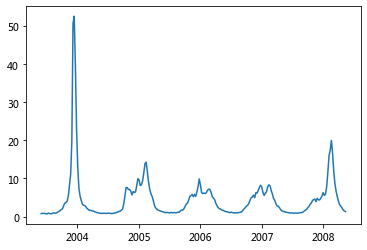

In [22]:
plt.plot(df['Date'], df['United States']);

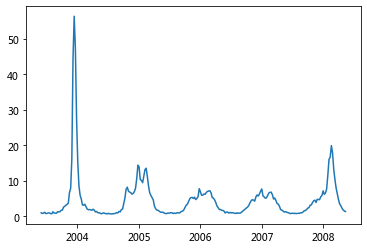

In [23]:
plt.plot(df['Date'], df['Mid-Atlantic Region']);

Figure 1: An evaluation of how many top-scoring queries to include in the ILI-related query fraction.

![image.png](./img/09gft1.png)

Maximal performance at estimating out-of-sample points during cross-validation was obtained by summing the top 45 search queries. A steep drop in model performance occurs after adding query 81, which is ‘oscar nominations’.

In [43]:
# Combine 45 queries
dict = {'date': df['Date'].tolist()}
for i in range(1, 46):
    df = pd.read_excel('41586_2009_BFnature07634_MOESM271_ESM.xls', sheet_name=i, header = 1)
    dict['query'+str(i)] = df['United States'].tolist()
dat = pd.DataFrame.from_dict(dict)
dat.head()

,date,query1,query2,query3,query4,query5,query6,query7,query8,query9,...,query36,query37,query38,query39,query40,query41,query42,query43,query44,query45
0,2003-06-01,0.778,5.297,6.096,0.893,1.036,1.357,0.124,0.366,0.675,...,0.483,0.131,0.633,0.173,0.241,0.848,0.138,0.190,2.027,2.133
1,2003-06-08,0.850,5.348,6.097,1.005,0.899,1.584,0.096,0.432,0.574,...,0.527,0.178,0.716,0.227,0.257,1.153,0.145,0.164,2.245,2.335
2,2003-06-15,0.838,4.961,5.772,0.868,0.811,1.515,0.084,0.392,0.563,...,0.509,0.156,0.760,0.213,0.234,1.123,0.138,0.213,2.338,2.311
3,2003-06-22,0.828,4.480,5.140,0.733,0.883,1.942,0.052,0.326,0.478,...,0.417,0.128,0.715,0.198,0.192,1.220,0.146,0.198,2.231,2.237
4,2003-06-29,0.747,3.910,4.409,0.637,0.726,1.580,0.049,0.352,0.364,...,0.429,0.080,0.671,0.150,0.153,1.114,0.138,0.165,2.005,2.085


## The Parable of Google Flu: Traps in Big Data Analysis

David Lazer*, Ryan Kennedy, Gary King, Alessandro Vespignani


Science 14 Mar 2014: Vol. 343, Issue 6176, pp. 1203-1205 DOI: 10.1126/science.1248506

In February 2013, Google Flu Trends (GFT) made headlines but not for a reason that Google executives or the creators of the flu tracking system would have hoped. Nature reported that GFT was predicting more than double the proportion of doctor visits for influenza-like illness (ILI) than the Centers for Disease Control and Prevention (CDC), which bases its estimates on surveillance reports from laboratories across the United States (1, 2). This happened despite the fact that GFT was built to predict CDC reports. Given that GFT is often held up as an exemplary use of big data (3, 4), what lessons can we draw from this error?

https://science.sciencemag.org/content/343/6176/1203.summary

**Data & Code**

https://science.sciencemag.org/content/sci/suppl/2014/03/12/343.6176.1203.DC1/1248506.Lazer.SM.revision1.pdf


Lazer, David; Kennedy, Ryan; King, Gary; Vespignani, Alessandro, 2014, "Replication data for: The Parable of Google Flu: Traps in Big Data Analysis", https://doi.org/10.7910/DVN/24823, Harvard Dataverse

In [51]:
# merge the ILI data
# cflu is CDC % ILI
dat2 = pd.read_csv('../GFT2.0/parable/ParableOfGFT(Replication).csv')
dat3 = dat2[['date', 'cflu']]
data = pd.merge(dat, dat3, how='right', on='date')
data.head()

,date,query1,query2,query3,query4,query5,query6,query7,query8,query9,...,query37,query38,query39,query40,query41,query42,query43,query44,query45,cflu
0,2003-09-28,1.853,6.679,7.824,1.072,2.399,1.623,0.162,0.606,0.731,...,0.224,0.741,0.324,0.496,1.267,0.294,0.204,2.097,2.905,0.884021
1,2003-10-05,1.976,6.310,8.259,1.194,2.733,1.589,0.167,0.607,0.662,...,0.210,0.852,0.295,0.442,1.329,0.322,0.225,2.233,2.713,1.027731
2,2003-10-12,2.834,6.911,9.009,1.228,3.304,1.581,0.221,0.664,0.783,...,0.259,0.890,0.306,0.413,1.392,0.353,0.201,2.305,2.874,1.282964
3,2003-10-19,3.501,7.492,9.611,1.291,3.846,1.619,0.326,0.698,0.841,...,0.260,0.900,0.352,0.450,1.357,0.383,0.255,2.279,2.965,1.326605
4,2003-10-26,3.721,7.121,9.352,1.309,3.876,1.640,0.288,0.674,0.762,...,0.260,0.950,0.293,0.393,1.367,0.319,0.271,2.317,2.986,1.773040


In [89]:
#data.to_csv('gft_ili_us.csv', index = False)

In [81]:
# filter data
data = data[data['query1'].notna()]
data['date'] = pd.to_datetime(data['date'])
data['date'] = data['date'].dt.date

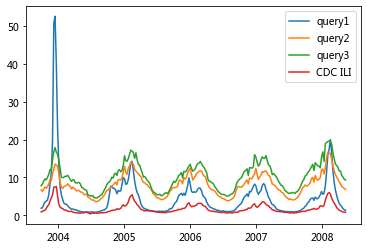

In [85]:
plt.plot(data['date'], data['query1'], label = 'query1')
plt.plot(data['date'], data['query2'], label = 'query2')
plt.plot(data['date'], data['query3'], label = 'query3')
plt.plot(data['date'], data['cflu'],  label = 'CDC ILI')
plt.legend()
plt.show()


Using this ILI-related query fraction as the explanatory variable, we fit a final linear model to weekly ILI percentages between 2003 and 2007 for all nine regions together, thus obtaining a single, region-independent coefficient. The model was able to obtain a good fit with CDC-reported ILI percentages, with a mean correlation of 0.90 (min = 0.80, max = 0.96, n = 9 regions; Fig. 2).

**Figure 2**: A comparison of model estimates for the mid-Atlantic region (black) against CDC-reported ILI percentages (red), including points over which the model was fit and validated.

![image.png](./img/09gft2.png)

A correlation of 0.85 was obtained over 128 points from this region to which the model was fit, whereas a correlation of 0.96 was obtained over 42 validation points. Dotted lines indicate 95% prediction intervals. The region comprises New York, New Jersey and Pennsylvania.

**Figure 3**: ILI percentages estimated by our model (black) and provided by the CDC (red) in the **mid-Atlantic region**, showing data available at four points in the 2007-2008 influenza season.

![image.png](./img/09gft3.png)

In [90]:
for i in range(1, 8):
    data["lag_{}".format(i)] = data['cflu'].shift(i)
print("done")
data=data.fillna(0)

done


In [131]:
y = data['cflu']
date = data['date']
X = data.drop(['cflu', 'date'], axis = 1)

In [96]:
len(y)

242

In [132]:
y

0      0.884021
1      1.027731
2      1.282964
3      1.326605
4      1.773040
         ...   
237    1.165197
238    1.020348
239    0.877607
240    0.825107
241    0.787315
Name: cflu, Length: 242, dtype: float64

In [133]:
X

,query1,query2,query3,query4,query5,query6,query7,query8,query9,query10,...,query43,query44,query45,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7
0,1.853,6.679,7.824,1.072,2.399,1.623,0.162,0.606,0.731,0.145,...,0.204,2.097,2.905,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,1.976,6.310,8.259,1.194,2.733,1.589,0.167,0.607,0.662,0.185,...,0.225,2.233,2.713,0.884021,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,2.834,6.911,9.009,1.228,3.304,1.581,0.221,0.664,0.783,0.259,...,0.201,2.305,2.874,1.027731,0.884021,0.000000,0.000000,0.000000,0.000000,0.000000
3,3.501,7.492,9.611,1.291,3.846,1.619,0.326,0.698,0.841,0.312,...,0.255,2.279,2.965,1.282964,1.027731,0.884021,0.000000,0.000000,0.000000,0.000000
4,3.721,7.121,9.352,1.309,3.876,1.640,0.288,0.674,0.762,0.321,...,0.271,2.317,2.986,1.326605,1.282964,1.027731,0.884021,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237,2.683,8.227,11.683,1.636,2.690,2.322,0.241,0.858,0.933,0.292,...,0.281,2.707,1.569,1.311296,1.652751,2.033656,2.692446,3.215218,3.832486,4.532340
238,2.290,7.648,10.502,1.435,2.359,2.239,0.165,0.769,0.850,0.225,...,0.254,2.568,1.510,1.165197,1.311296,1.652751,2.033656,2.692446,3.215218,3.832486
239,1.766,7.375,10.081,1.258,2.031,2.194,0.142,0.735,0.775,0.214,...,0.237,2.480,1.468,1.020348,1.165197,1.311296,1.652751,2.033656,2.692446,3.215218
240,1.446,7.132,9.531,1.097,1.930,2.190,0.114,0.654,0.657,0.188,...,0.269,2.436,1.378,0.877607,1.020348,1.165197,1.311296,1.652751,2.033656,2.692446


In [99]:
N = 50
X_train = X.iloc[:N,]
X_test = X.iloc[N:,]
y_train = y[:N]
y_test = y[N:]

# 利用弹性网络
from sklearn.model_selection import cross_val_score
cv_model = ElasticNetCV(l1_ratio=0.5, eps=1e-3, n_alphas=200, fit_intercept=True, 
                        normalize=True, precompute='auto', max_iter=200, tol=0.006, cv=10, 
                        copy_X=True, verbose=0, n_jobs=-1, positive=False, random_state=0)

# 训练模型              
cv_model.fit(X_train, y_train)

# 计算最佳迭代次数、alpha和ratio
print('最佳 alpha: %.8f'%cv_model.alpha_)
print('最佳 l1_ratio: %.3f'%cv_model.l1_ratio_)
print('迭代次数 %d'%cv_model.n_iter_)

最佳 alpha: 0.06455398
最佳 l1_ratio: 0.500
迭代次数 63


In [102]:
# 输出结果
y_train_pred = cv_model.predict(X_train)
y_pred = cv_model.predict(X_test)
print('Train r2 score: ', r2_score(y_train_pred, y_train))
print('Test r2 score: ', r2_score(y_test, y_pred))
train_mse = mean_squared_error(y_train_pred, y_train)
test_mse = mean_squared_error(y_pred, y_test)
train_rmse = np.sqrt(train_mse)
test_rmse = np.sqrt(test_mse)
print('Train RMSE: %.4f' % train_rmse)
print('Test RMSE: %.4f' % test_rmse)

Train r2 score:  0.899526504124001
Test r2 score:  0.8509986476456004
Train RMSE: 0.4792
Test RMSE: 0.4345


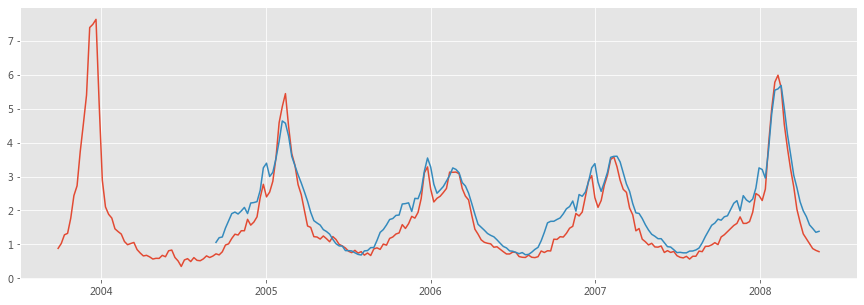

In [103]:
import datetime
plt.style.use('ggplot')

plt.rcParams.update({'figure.figsize': (15, 5)})

plt.plot(date, y)
plt.plot(date[N:], y_pred)

plt.show()

However, this apparent success story eventually turned into an embarrassment. 

1. Google Flu Trends with all its data, machine learning, and powerful computing did not dramatically outperform a simple and easier-to-understand heuristic. This suggests that when evaluating any forecast or nowcast, it is important to compare against a baseline.
2. Its ability to predict the CDC flu data was prone to short-term failure and long-term decay because of drift and algorithmic confounding. 

These two caveats complicate future nowcasting efforts, but they do not doom them. In fact, by using more careful methods, Lazer et al. (2014) and Yang, Santillana, and Kou (2015) were able to avoid these two problems.

## References


- Goel, Sharad, Jake M. Hofman, Sébastien Lahaie, David M. Pennock, and Duncan J. Watts. 2010. “Predicting Consumer Behavior with Web Search.” Proceedings of the National Academy of Sciences of the USA 107 (41):17486–90. https://doi.org/10.1073/pnas.1005962107.

- Yang, Shihao, Mauricio Santillana, and S. C. Kou. 2015. “Accurate Estimation of Influenza Epidemics Using Google Search Data via ARGO.” Proceedings of the National Academy of Sciences of the USA 112 (47):14473–8. https://doi.org/10.1073/pnas.1515373112.

- Lazer, David, Ryan Kennedy, Gary King, and Alessandro Vespignani. 2014. “The Parable of Google Flu: Traps in Big Data Analysis.” Science 343 (6176):1203–5. https://doi.org/10.1126/science.1248506.

## Learning by Doing

https://github.com/JEstebanMejiaV/The.Analytics.Edge/blob/352d59a27d2c376f268b1dbdf838e9ee77989d36/Unit%202%20-%20Linear%20Regression/Detecting%20Flu%20Epidemics%20via%20Search%20Engine%20Query%20Data.ipynb

In [86]:
dat = pd.read_csv('FluTrain.csv')
dat.head()

,Week,ILI,Queries
0,2004-01-04 - 2004-01-10,2.418331,0.237716
1,2004-01-11 - 2004-01-17,1.809056,0.220452
2,2004-01-18 - 2004-01-24,1.712024,0.225764
3,2004-01-25 - 2004-01-31,1.542495,0.237716
4,2004-02-01 - 2004-02-07,1.437868,0.224436


In [88]:
dat['Week']

0      2004-01-04 - 2004-01-10
1      2004-01-11 - 2004-01-17
2      2004-01-18 - 2004-01-24
3      2004-01-25 - 2004-01-31
4      2004-02-01 - 2004-02-07
                ...           
412    2011-11-27 - 2011-12-03
413    2011-12-04 - 2011-12-10
414    2011-12-11 - 2011-12-17
415    2011-12-18 - 2011-12-24
416    2011-12-25 - 2011-12-31
Name: Week, Length: 417, dtype: object

In [104]:
for i in range(1, 8):
    dat["lag_{}".format(i)] = dat['ILI'].shift(i)
print("done")
dat=dat.fillna(0)

done


In [128]:
y = dat['ILI']
week = dat['Week']
week = [i[:10] for i in week.tolist()]
week = pd.to_datetime(week)
X = dat.drop(['ILI', 'Week'], axis = 1)

In [130]:
y

0      2.418331
1      1.809056
2      1.712024
3      1.542495
4      1.437868
         ...   
412    1.465723
413    1.518106
414    1.663954
415    1.852736
416    2.124130
Name: ILI, Length: 417, dtype: float64

In [109]:
X

,Queries,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7
0,0.237716,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.220452,2.418331,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.225764,1.809056,2.418331,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.237716,1.712024,1.809056,2.418331,0.000000,0.000000,0.000000,0.000000
4,0.224436,1.542495,1.712024,1.809056,2.418331,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...
412,0.478088,1.655415,1.462212,1.440892,1.452843,1.305461,1.252586,1.236957
413,0.464807,1.465723,1.655415,1.462212,1.440892,1.452843,1.305461,1.252586
414,0.479416,1.518106,1.465723,1.655415,1.462212,1.440892,1.452843,1.305461
415,0.537849,1.663954,1.518106,1.465723,1.655415,1.462212,1.440892,1.452843


In [110]:
N = 100
X_train = X.iloc[:N,]
X_test = X.iloc[N:,]
y_train = y[:N]
y_test = y[N:]

# 利用弹性网络
from sklearn.model_selection import cross_val_score
cv_model = ElasticNetCV(l1_ratio=0.5, eps=1e-3, n_alphas=200, fit_intercept=True, 
                        normalize=True, precompute='auto', max_iter=200, tol=0.006, cv=10, 
                        copy_X=True, verbose=0, n_jobs=-1, positive=False, random_state=0)

# 训练模型              
cv_model.fit(X_train, y_train)

# 计算最佳迭代次数、alpha和ratio
print('最佳 alpha: %.8f'%cv_model.alpha_)
print('最佳 l1_ratio: %.3f'%cv_model.l1_ratio_)
print('迭代次数 %d'%cv_model.n_iter_)

最佳 alpha: 0.00034012
最佳 l1_ratio: 0.500
迭代次数 15


In [111]:
# 输出结果
y_train_pred = cv_model.predict(X_train)
y_pred = cv_model.predict(X_test)
print('Train r2 score: ', r2_score(y_train_pred, y_train))
print('Test r2 score: ', r2_score(y_test, y_pred))
train_mse = mean_squared_error(y_train_pred, y_train)
test_mse = mean_squared_error(y_pred, y_test)
train_rmse = np.sqrt(train_mse)
test_rmse = np.sqrt(test_mse)
print('Train RMSE: %.4f' % train_rmse)
print('Test RMSE: %.4f' % test_rmse)

Train r2 score:  0.8704190473192481
Test r2 score:  0.9216895094890315
Train RMSE: 0.2868
Test RMSE: 0.3293


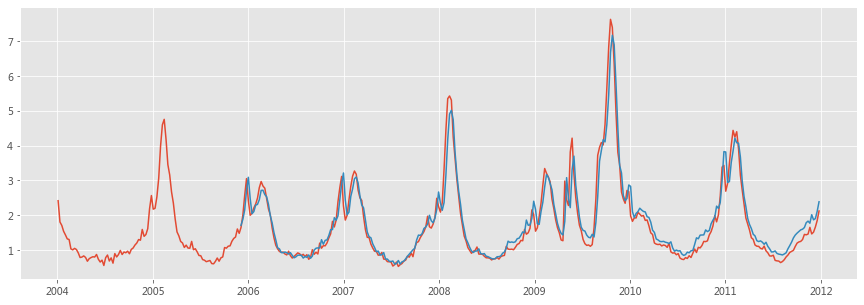

In [129]:
plt.plot(week, y)
plt.plot(week[N:], y_pred)
plt.show()